# **차이코퍼레이션 / B2B 마케팅**
## **##1. 데이터 전처리**


In [106]:
import os 
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import font_manager
from datetime import datetime, timedelta
import csv

### 데이터 추출 및 데이터

In [107]:
# 차이코퍼레이션 결제 데이터 csv 받아오기
Customer_data = pd.read_csv('차이코퍼레이션 결제 데이터(BA_assesment).csv')


In [108]:
# 데이터 형태 확인
Customer_data.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5


In [109]:
# 데이터 기본정보 확인
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   customer_id      int64 
 1   created_at       object
 2   pre_discount     int64 
 3   post_discount    int64 
 4   cashback_amount  int64 
 5   discount_amount  int64 
 6   total_promotion  int64 
 7   push_permission  bool  
 8   gender           object
 9   is_foreigner     bool  
 10  birthday         object
 11  sign_up_date     object
 12  merchant_id      int64 
dtypes: bool(2), int64(7), object(4)
memory usage: 482.7+ MB


In [110]:
# null 결측치 확인
Customer_data.isnull().sum()

customer_id        0
created_at         0
pre_discount       0
post_discount      0
cashback_amount    0
discount_amount    0
total_promotion    0
push_permission    0
gender             0
is_foreigner       0
birthday           0
sign_up_date       0
merchant_id        0
dtype: int64

### 데이터 전처리 근거
차이코퍼레이션 기업의 경우 차이페이를 사용한 온라인 결제 서비스로 수수료를 통해 수익을 보는 형태의 기업이며, 같은 온라인 결제 서비스 기업인 Payco와는 다르게 국내 서비스만 시행한 기업이기 때문에 국내인들로 데이터들을 구성하였다.

In [111]:
# 내국인 데이터 추출을 위해 전처리
Customer_data['is_foreigner'].value_counts()

False    5561804
True       62006
Name: is_foreigner, dtype: int64

In [112]:
# 내국인 데이터 추출
Domestic_M = (Customer_data['is_foreigner'] == False)
Domestic = Customer_data.loc[Domestic_M,:]
Domestic['is_foreigner'].value_counts()

False    5561804
Name: is_foreigner, dtype: int64

In [113]:
# 데이터 확인
Domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5561804 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   customer_id      int64 
 1   created_at       object
 2   pre_discount     int64 
 3   post_discount    int64 
 4   cashback_amount  int64 
 5   discount_amount  int64 
 6   total_promotion  int64 
 7   push_permission  bool  
 8   gender           object
 9   is_foreigner     bool  
 10  birthday         object
 11  sign_up_date     object
 12  merchant_id      int64 
dtypes: bool(2), int64(7), object(4)
memory usage: 519.8+ MB


In [114]:
Domestic.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5


### 연령별 구분

In [115]:
# 나이 계산을 위해 birthday를 datetime으로 형 변환
Domestic['birthday'] = pd.to_datetime(Domestic['birthday'])

C:\Users\rhlab\AppData\Local\Temp\ipykernel_25756\225432355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Domestic['birthday'] = pd.to_datetime(Domestic['birthday'])


In [116]:
# 형 변환 확인
Domestic['birthday'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5561804 entries, 0 to 5623809
Series name: birthday
Non-Null Count    Dtype         
--------------    -----         
5561804 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 84.9 MB


In [117]:
# today 날짜 가져오기
today = datetime.now().date()
today

datetime.date(2023, 6, 1)

In [118]:
# ['age'] 행 추가 후 구매내역별 나이 계산
Domestic['age'] = today.year - Domestic['birthday'].dt.year

C:\Users\rhlab\AppData\Local\Temp\ipykernel_25756\2343550268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Domestic['age'] = today.year - Domestic['birthday'].dt.year


In [119]:
# 누락 데이터 확인
Domestic['age'].isnull().sum()

0

In [120]:
Domestic['age'].value_counts()

41     268939
42     266739
40     257439
43     257414
39     228553
        ...  
94         38
17         16
96          6
104         6
97          2
Name: age, Length: 83, dtype: int64

In [121]:
Domestic.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,age
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9,66
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6,40
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9,48
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4,27
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5,24


In [122]:
# 연령별로 나누기 위한 함수
def age_categories(age):
    age = (age // 10) * 10
    return age

In [123]:
# age_category에 연령대 생성
age_category = Domestic.age.apply(age_categories)
age_category

0          60
1          40
2          40
3          20
4          20
           ..
5623805    40
5623806    30
5623807    30
5623808    40
5623809    30
Name: age, Length: 5561804, dtype: int64

In [124]:
# category로 형 변환
age_category = age_category.astype('category')
age_category.info()

<class 'pandas.core.series.Series'>
Int64Index: 5561804 entries, 0 to 5623809
Series name: age
Non-Null Count    Dtype   
--------------    -----   
5561804 non-null  category
dtypes: category(1)
memory usage: 47.7 MB


In [125]:
# 14번째 행에 age_category 데이터 추가 
Domestic.insert(14, 'age_category', age_category)
Domestic.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,age,age_category
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9,66,60
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6,40,40
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9,48,40
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4,27,20
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5,24,20


In [126]:
# 변경한 데이터 타입 확인
Domestic.dtypes

customer_id                 int64
created_at                 object
pre_discount                int64
post_discount               int64
cashback_amount             int64
discount_amount             int64
total_promotion             int64
push_permission              bool
gender                     object
is_foreigner                 bool
birthday           datetime64[ns]
sign_up_date               object
merchant_id                 int64
age                         int64
age_category             category
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x16fd3d631d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16fd3d704d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f676ae610>],
 'medians': [<matplotlib.lines.Line2D at 0x16fd3d71110>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e99593b90>],
 'means': []}

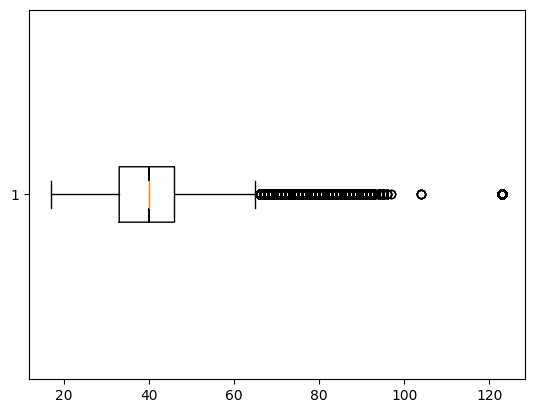

In [127]:
# 연령 분포 확인, 이상치 확인
plt.boxplot(Domestic['age'], notch=True, whis=1.5, vert=False)

In [128]:
# 정확한 데이터 정보를 추출하기 위해 19세 이하, 80세 이상 데이터들은 삭제
Domestic = Domestic.loc[(Domestic['age'] <= 80) & (Domestic['age'] >= 19)]

In [129]:
# age 데이터 확인
Domestic['age'].unique()

array([66, 40, 48, 27, 24, 44, 49, 37, 36, 46, 42, 33, 39, 43, 45, 35, 28,
       50, 38, 31, 34, 41, 51, 47, 30, 29, 58, 54, 25, 52, 59, 20, 55, 26,
       32, 71, 23, 56, 68, 61, 62, 64, 21, 57, 53, 19, 60, 22, 63, 67, 73,
       77, 65, 69, 74, 70, 76, 79, 72, 75, 80, 78], dtype=int64)

In [130]:
Domestic.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,age,age_category
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9,66,60
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6,40,40
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9,48,40
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4,27,20
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5,24,20


### 중복 데이터 확인

In [131]:
# 주문자별 중복 데이터 확인
duplicate_data = Domestic['customer_id'].duplicated()
duplicate_data.value_counts()


True     5009906
False     537314
Name: customer_id, dtype: int64

In [132]:
# 정보의 약 10%를 차지하여, 중복 데이터 처리 하지 않음
(537314 / 5009906) * 100

10.72503156745855

### 필요없는 칼럼 삭제

In [133]:
Domestic = Domestic.drop(['created_at','push_permission','is_foreigner','sign_up_date','merchant_id','birthday'], axis=1)
Domestic.head()

,customer_id,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,age,age_category
0,207317,36236,36236,1087,0,1087,female,66,60
1,95246,12900,12900,387,0,387,female,40,40
2,208074,7500,7500,225,0,225,female,48,40
3,15552,11800,11800,354,0,354,male,27,20
4,511595,29700,29700,891,0,891,female,24,20


In [135]:
Domestic.to_csv('EDA_data.csv',index = False)

In [ ]:
# fig = sns.pairplot(a_df, hue='gender')
# fig